Lambda School Data Science

---

# Logistic Regression


## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

*Associate Instructor* is a teaching position where you will work closely students — delivering curriculum, and leading question and answer sessions. The purpose of this assignment is to give us an idea of how you approach data science problems and whether you can explain that approach to someone who does not yet have your level of expertise. Given this, we are less interested you building a "perfect" model and more focused on how you use this assignment to teach important concepts to a data science student.

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

### Import the burrito `csv` file

In [1]:
# Import Data

import pandas as pd
import numpy as np
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')

### Conduct exploratory data analysis (EDA)

In this section I'll take a look at the data and begin formulating ideas about which columns should be kept, deleted, or modified in some way, which I'll complete in the next section: __Clean Data__.

In [2]:
# What does the data actually look like?

df.head(5)

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [3]:
# How much data do we have?

print(f'There are {df.shape[0]} rows')

There are 421 rows


In [4]:
# What do the columns look like?

df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Reviewer',
       'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
       'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'],
      dtype='object')

In [5]:
# What kind of data exists in each column?

df.info(verbose=True)

print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        421 non-null    object 
 1   Burrito         421 non-null    object 
 2   Date            421 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            414 non-null    float64
 10  Hunger          418 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          283 non-null    float64
 14  Circum          281 non-null    float64
 15  Volume          281 non-null    float64
 16  Tortilla        421 non-null    float64
 17  Temp            401 non-null    flo

In [6]:
# How balanced is the target variable?

df["Great"].value_counts()

False    239
True     182
Name: Great, dtype: int64

### Clean data

Now I'll take what I've learned from the last section and drop rows I don't think will be useful. I'll also interpolate data as needed.

The columns `Location`, `Burrito`, `Neighborhood`, and `Reviewer` represent discrete categories and can be dummy encoded. However, if there are too many unique values in each column, the number of resulting dummy columns can be huge. So first I'll check to see how many values each column has:

In [7]:
df["Location"].value_counts().shape

(108,)

In [8]:
df["Burrito"].value_counts().shape

(132,)

In [9]:
df["Neighborhood"].value_counts().shape

(41,)

In [10]:
df["Reviewer"].value_counts().shape

(106,)

In [11]:
df["NonSD"].value_counts()

x    5
X    2
Name: NonSD, dtype: int64

Given the relatively small number of rows, it makes sense to drop these columns from consideration. Other features could be generated from these - such as combining close-by neighborhoods or clumping together burrito types (i.e. a binary feature that represents _California burrito_ vs _non-Cali_), but for time purposes and simplicity I'll skip this. In the future we can revisit these features and work with them if needed.

I'm also going to __assume__ that the column `Address` and `URL` are redundant given the name of the burrito shop, so I'll drop them as well.

The remaining columns are floats or objects - floats represent ratings of specific burrito parts (i.e. `Meat`) or things like `Cost` or `Weight`. The columns encoded as objects represent the absence or presence of certain features (i.e. `Avocado`) or whether or not the burrito is recommended `Rec`. `Notes` is text and can be munged, but I will skip doing that for time reasons.

Also drop the `Queso` column because it's empty.

In [12]:
# Drop columns I don't want

df = df.drop(['Location', 'Burrito', 'Neighborhood', 'Reviewer', 'Address', 'URL', 'Notes', 'NonSD', 'Queso', 'Unreliable'], axis=1)

In [13]:
# Of the float columns, check which ones have lots of NaN's

cols = ['Yelp', 'Google', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap']
        
df[cols].isna().sum()

Yelp              334
Google            334
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
dtype: int64

In [14]:
# Drop the columns with over 100 NaN's

df = df.drop(['Yelp', 'Google', 'Mass (g)', 'Density (g/mL)', 'Length', 'Circum', 'Volume'], axis=1)

In [15]:
# Fill in the remaining NaN's with the column averages
# Alternatively: drop rows with missing values

cols = ['Cost', 'Hunger', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap']
for col in cols:
    df[col].fillna(value=df[col].mean(), inplace=True)

In [16]:
df

,Date,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,1/18/2016,NaN,6.49,3.0,3.0,5.0,3.000000,3.500000,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1/24/2016,NaN,5.45,3.5,2.0,3.5,2.500000,2.500000,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,1/24/2016,NaN,4.85,1.5,3.0,2.0,2.500000,3.000000,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1/24/2016,NaN,5.25,2.0,3.0,2.0,3.500000,3.000000,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,1/27/2016,x,6.59,4.0,4.0,5.0,4.000000,3.500000,4.5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,8/27/2019,NaN,6.00,1.0,5.0,4.0,3.500000,3.539833,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
417,8/27/2019,NaN,6.00,4.0,4.0,5.0,3.620393,3.500000,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
418,8/27/2019,NaN,7.90,3.0,4.0,4.0,4.000000,3.700000,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
419,8/27/2019,NaN,7.90,3.0,5.0,2.0,5.000000,5.000000,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [17]:
# Binary encode these columns instead of dummy encoding

cols = ['Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
       'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Chips']

d = {'X': 1, 'x': 1, np.NaN: 0}

for col in cols:
    df[col] = df[col].map(d)

In [18]:
df

,Date,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,1/18/2016,0.0,6.49,3.0,3.0,5.0,3.000000,3.500000,4.0,4.0,...,0,0,0,0,0,0,0,0,0,False
1,1/24/2016,0.0,5.45,3.5,2.0,3.5,2.500000,2.500000,2.0,4.0,...,0,0,0,0,0,0,0,0,0,False
2,1/24/2016,0.0,4.85,1.5,3.0,2.0,2.500000,3.000000,4.5,4.0,...,0,0,0,0,0,0,0,0,0,False
3,1/24/2016,0.0,5.25,2.0,3.0,2.0,3.500000,3.000000,4.0,5.0,...,0,0,0,0,0,0,0,0,0,False
4,1/27/2016,1.0,6.59,4.0,4.0,5.0,4.000000,3.500000,4.5,5.0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,8/27/2019,0.0,6.00,1.0,5.0,4.0,3.500000,3.539833,4.0,4.0,...,0,0,0,0,0,0,0,0,0,False
417,8/27/2019,0.0,6.00,4.0,4.0,5.0,3.620393,3.500000,4.0,4.0,...,0,0,0,0,0,0,0,0,0,True
418,8/27/2019,0.0,7.90,3.0,4.0,4.0,4.000000,3.700000,3.0,2.0,...,0,0,0,0,0,0,0,0,0,False
419,8/27/2019,0.0,7.90,3.0,5.0,2.0,5.000000,5.000000,5.0,2.0,...,0,0,0,0,0,0,0,0,0,True


In [19]:
# Convert to datetime object

df['Date'] = pd.to_datetime(df['Date'])

df = df.drop("Chips", axis=1)

In [20]:
df.dtypes

Date             datetime64[ns]
Cost                    float64
Hunger                  float64
Tortilla                float64
Temp                    float64
Meat                    float64
Fillings                float64
Meat:filling            float64
Uniformity              float64
Salsa                   float64
Synergy                 float64
Wrap                    float64
Beef                      int64
Pico                      int64
Guac                      int64
Cheese                    int64
Fries                     int64
Sour cream                int64
Pork                      int64
Chicken                   int64
Shrimp                    int64
Fish                      int64
Rice                      int64
Beans                     int64
Lettuce                   int64
Tomato                    int64
Bell peper                int64
Carrots                   int64
Cabbage                   int64
Sauce                     int64
Salsa.1                   int64
Cilantro

### Do train/validate/test split

In [21]:
# Reindex based on date

df = df.set_index('Date')

In [22]:
# Define independent vs dependent variables.

X = [i for i in df.columns.to_list() if i not in "Great"]
y = "Great"

In [23]:
# Show what this looks like

df[X].loc['2017-01-01':'2017-12-31'][:5]

<ipython-input-23-a8200cb70dfc>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df[X].loc['2017-01-01':'2017-12-31'][:5]


,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,...,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,6.60,3.495335,4.0,4.5,4.000000,3.5,3.500000,5.0,1.5,3.50,...,0,0,0,0,0,0,0,0,0,0
2017-01-04,6.60,3.495335,4.0,2.0,3.620393,4.0,3.586481,4.6,4.2,3.75,...,0,0,0,0,0,0,0,0,0,0
2017-01-07,8.50,3.900000,3.0,4.5,4.100000,3.0,3.700000,4.0,4.3,4.20,...,0,0,0,0,0,0,0,0,0,0
2017-01-07,7.90,4.000000,3.5,4.0,4.000000,3.0,4.000000,4.5,4.0,3.80,...,0,0,0,0,0,0,0,0,0,0
2017-01-10,4.99,3.500000,2.5,4.5,3.000000,2.5,3.000000,3.0,2.0,2.00,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Split the train/val/test sets by date

X_train = df[X].loc[:'2016-12-31']
y_train = df[y].loc[:'2016-12-31']

X_val = df[X].loc['2017-01-01':'2017-12-31']
y_val = df[y].loc['2017-01-01':'2017-12-31']

X_test = df[X].loc['2018-01-01':]
y_test = df[y].loc['2018-01-01':]

<ipython-input-24-25ebaf7b045c>:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_val = df[X].loc['2017-01-01':'2017-12-31']
<ipython-input-24-25ebaf7b045c>:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  y_val = df[y].loc['2017-01-01':'2017-12-31']
<ipython-input-24-25ebaf7b045c>:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_test = df[X].loc['2018-01-01':]
<ipython-input-24-25ebaf7b045c>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  y_test = df[y].loc['2018-01-01':]


In [25]:
# Show how many rows are in each set
# These numbers aren't exactly balanced, but I will follow the requirements of this task and keep them as is

print(f'# rows in training set:   {X_train.shape[0]}')
print(f'# rows in validation set: {X_val.shape[0]}')
print(f'# rows in test set:       {X_test.shape[0]}')

# rows in training set:   298
# rows in validation set: 85
# rows in test set:       38


### Determine baseline accuracy for a naïve classification model

How often will a model that guesses "great" every time be accurate? If the distribution of Great/Not Great is very skewed (lots more greats than not greats), then we can get a high accuracy by simply classifying every burrito as "Great"! Some people just really love Mexican food...

In [26]:
df["Great"].value_counts()

False    239
True     182
Name: Great, dtype: int64

In [27]:
print(f'{df["Great"].value_counts()[1]/df.shape[0]:.2}')

0.43


In [28]:
# Subtract this from 1 because the model can also simply guess the opposite

print(f'{1 - df["Great"].value_counts()[1]/df.shape[0]:.2}')

0.57


If the logistic model I create is "useful", its classification accuracy should be above _0.57_

In [29]:
# Make a simple sklearn model and get the accuracy on the training data

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# Scale data

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Show accuracy on the _training_ data

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print(f"The model's accuracy on the training data is: {clf.score(X_train, y_train):.2}")

The model's accuracy on the training data is: 0.92


### Create a `scikit-learn` pipeline

In [30]:
from sklearn.pipeline import Pipeline

# Optional: add dummy encoding
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), 
                 ('logistic_reg', LogisticRegression())])

### Train model using training data

In [31]:
pipe.fit(X_train, y_train)

print(f"{pipe.score(X_test, y_test):.2}")

0.79


### Create visualization of model coefficients

Later experiments: perform variable selection

In [32]:
df.columns

Index(['Cost', 'Hunger', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Beef',
       'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken',
       'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper',
       'Carrots', 'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion',
       'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini',
       'Great'],
      dtype='object')

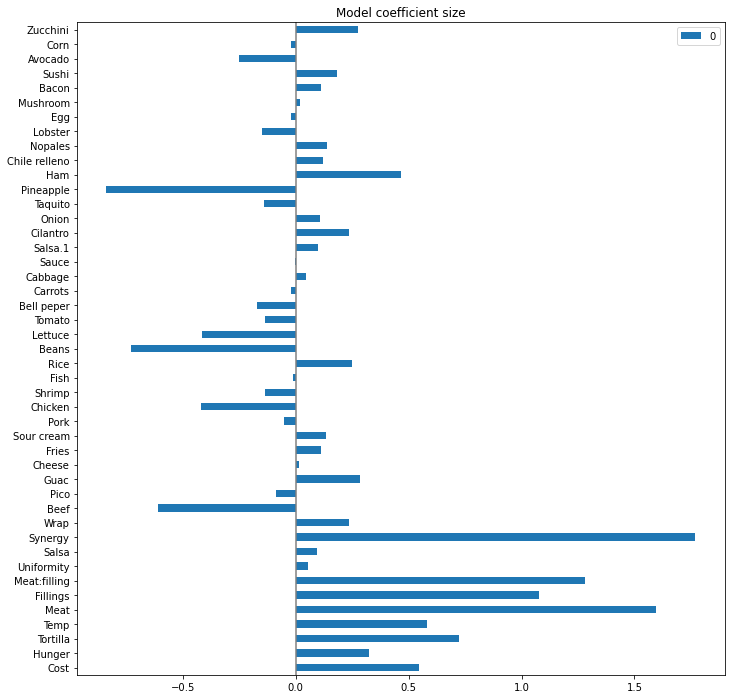

In [33]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    clf.coef_,
    columns=df.columns[:-1] # to remove "Great"
).T

coefs.plot(kind='barh', figsize=(15, 12))
plt.title('Model coefficient size')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### Get model's validation accuracy

In [34]:
print(f"{pipe.score(X_val, y_val):.2}")

0.79


### Get your model's test accuracy

In [35]:
print(f"{pipe.score(X_test, y_test):.2}")

0.79
